In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
pd.options.mode.chained_assignment = None

import random
random.seed(68)

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)

from rdkit import Chem
from rdkit.Chem import PandasTools



INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import sys
sys.path.append('../')
from Draw_fig import Draw_plot
from standardization_process import *

# Summary for the raw data

In [4]:
Chembl = pd.read_csv('../data/data_mining_results/Liver_microsomes_clearance/cl_Chembl_data_mining_finished.csv')

In [10]:
Chembl = Chembl[~Chembl['Liver_microsomes_clearance experiment'].isna()]
Chembl.shape

(16822, 26)

In [12]:
Chembl["Assay ChEMBL ID"].nunique()

2194

## Chembl

In [17]:
Chembl = pd.read_csv('../data/data_mining_results/Liver_microsomes_clearance/cl_Chembl_data_mining_finished.csv')

In [18]:
Chembl.shape

(22031, 26)

In [19]:
Chembl.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Document ChEMBL ID,Source Description,Document Journal,Document Year,Compound Concentration,Incubation Time,Presence of NADPH/NADP,Enzyme Source,Temperature Range,Analytical Technique,Species,Route of Administration,Type of Microsomes,Protein Amount or Microsomal Protein Concentration,Liver_microsomes_clearance experiment
0,CHEMBL256784,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,CL,'=',77.0,mL.min-1.g-1,CHEMBL928910,Intrinsic clearance in human microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,microsomes,none,none,human,none,microsomes,none,True
1,CHEMBL257197,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,CL,'=',14.0,mL.min-1.g-1,CHEMBL928911,Intrinsic clearance in rat microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,rat microsomes,none,none,rat,none,microsomes,none,True
2,CHEMBL256995,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,CL,'=',18.0,mL.min-1.g-1,CHEMBL928911,Intrinsic clearance in rat microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,rat microsomes,none,none,rat,none,microsomes,none,True
3,CHEMBL484952,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,CL,'=',89.0,mL.min-1.g-1,CHEMBL1002992,Metabolic stability in rat microsomes assessed...,A,BAO_0000251,microsome format,CHEMBL1138444,Scientific Literature,J Med Chem,2009.0,none,none,none,rat,none,none,rat,none,microsomes,none,True
4,CHEMBL363840,Cn1nnnc1-c1cccc(NC(=O)N[C@@H]2CCCC[C@H]2CN2CCC...,CL,'=',15.0,mL.min-1.kg-1,CHEMBL851746,Clearance was measured in mice,A,BAO_0000218,organism-based format,CHEMBL1143552,Scientific Literature,J Med Chem,2005.0,none,none,none,none,none,none,mice,none,none,per mg of protein,True


In [20]:
Chembl['Liver_microsomes_clearance experiment'].value_counts()

True     12186
False     4636
Name: Liver_microsomes_clearance experiment, dtype: int64

In [21]:
Chembl['Liver_microsomes_clearance experiment'] = Chembl['Liver_microsomes_clearance experiment'].fillna(False)
Chembl = Chembl[Chembl['Liver_microsomes_clearance experiment'] == True]

In [22]:
Chembl = Chembl[Chembl['Standard Value'] > 0]

In [23]:
Chembl = Chembl[Chembl['Standard Units'].isin(['mL.min-1.g-1', 'mL.min-1.kg-1'])]

In [24]:
Chembl['value'] = Chembl['Standard Value'].map(np.log10)

In [25]:
# Chembl['value'] = Chembl.apply(lambda x: np.log10(x['Standard Value']) if x['Standard Units'] == 'mL.min-1.g-1' else np.log10(x['Standard Value']),axis=1)

In [26]:
Chembl['unit'] = 'log10(mL.min-1.g-1)'

In [27]:
Chembl['source'] = Chembl['Assay ChEMBL ID']

In [28]:
Chembl = process_stage_1(Chembl,'Smiles')

100%|███████████████████████████████████████| 11890/11890 [00:01<00:00, 9408.62it/s]


SANITIZE_NONE    11890
Name: Smiles_check, dtype: int64


100%|████████████████████████████████████| 11890/11890 [00:00<00:00, 1185242.76it/s]
11890it [00:11, 1010.22it/s]


Metal in Smiles amount: 0


100%|███████████████████████████████████████| 11890/11890 [00:01<00:00, 9282.36it/s]


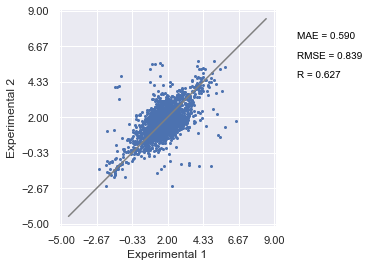

In [29]:
plot_diagram(Chembl,['Smiles_unify'],'value')

In [30]:
Chembl.columns

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation',
       'Standard Value', 'Standard Units', 'Assay ChEMBL ID',
       'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label',
       'Document ChEMBL ID', 'Source Description', 'Document Journal',
       'Document Year', 'Compound Concentration', 'Incubation Time',
       'Presence of NADPH/NADP', 'Enzyme Source', 'Temperature Range',
       'Analytical Technique', 'Species', 'Route of Administration',
       'Type of Microsomes',
       'Protein Amount or Microsomal Protein Concentration',
       'Liver_microsomes_clearance experiment', 'value', 'unit', 'source',
       'Smiles_check', 'Smiles_removesalt', 'Smiles_unify'],
      dtype='object')

In [31]:
for experiment in ['Compound Concentration', 'Incubation Time',
       'Presence of NADPH/NADP', 'Enzyme Source', 'Temperature Range',
       'Analytical Technique', 'Species', 'Route of Administration',
       'Type of Microsomes',
       'Protein Amount or Microsomal Protein Concentration']:
    display(Chembl[experiment].value_counts(dropna=False).head(30))

none                          5343
1 uM                          3263
0.5 uM                         777
1 mg/kg                        309
10 uM                          246
1uM                            181
2 uM                           147
5 uM                           145
2 mg/kg                        112
2.5 uM                         112
5 mg/kg                         97
0.1 uM                          96
3 uM                            93
1 to 2.5 uM                     73
10 mM                           63
0.5 mg/kg                       54
3 mg/kg                         51
1 umol/L                        40
100 uM                          33
1 mg/kg, iv or 3 mg/kg, po      32
0.3 uM                          31
50 uM                           31
10uM                            28
0.1 mg/kg                       26
unbound                         23
0.625 uM                        23
1 mg/kg, iv or 2 mg/kg, po      19
in presence of NADPH            17
0.2 uM              

none              6157
up to 30 mins      873
30 mins            667
up to 60 mins      571
up to 45 mins      459
5 to 30 mins       323
60 mins            225
up to 90 mins      150
after 30 mins      135
after 60 mins      134
up to 120 mins     111
up to 24 hrs       108
up to 15 mins       96
15 mins             87
assessed            79
up to 40 mins       78
after 45 mins       76
over 60 mins        67
for 60 mins         64
for 10 mins         61
after 120 mins      58
4 hrs               57
after 20 mins       48
1 to 40 mins        41
15 to 30 mins       41
up to 4 hrs         40
for 30 mins         39
measured            36
for 120 mins        32
after 10 mins       31
Name: Incubation Time, dtype: int64

none                                6113
NADPH                               4059
NADPH regenerating system            323
NADPH generating system              281
1.5 mM NADPH                         141
NADP                                 101
iv                                    94
unbound                               75
intrinsic clearance                   55
NADPH-regenerating system             53
iv or po                              46
NADP+                                 31
po or iv                              28
NADPH/UDP-glucuronic acid             26
NADPH regeneration system             24
unbound intrinsic clearance           23
mouse liver microsomes                20
human liver microsomes                20
phase 1 and 2 cofactors               20
UGT                                   19
per mg of protein                     18
iv dosed                              18
glucose-6-phosphate                   17
po                                    16
metabolic phase 

liver                        5033
liver microsomes             2491
none                          919
hepatocytes                   461
human liver microsomes        401
rat liver microsomes          364
plasma                        359
mouse liver microsomes        260
microsomes                    181
rat                           139
rat plasma                    135
liver microsome               110
hepatic microsomes            106
NaN                            99
rat microsomes                 73
rat hepatocytes                61
human microsomes               59
mouse microsomes               55
Sprague-Dawley rat             44
mouse plasma                   42
human liver                    39
mouse                          37
S9 fraction                    26
Hepatocyte                     25
Sprague-Dawley rat plasma      23
rat hepatic microsomes         20
mouse hepatocytes              20
gut microsomes                 19
human liver S9 fraction        19
mouse microsom

none                       11844
shaking condition             39
under shaking condition        7
Name: Temperature Range, dtype: int64

none                             5220
LC-MS/MS                         4107
LC/MS/MS                          506
UPLC-MS/MS                        374
LC-MS                             299
HPLC-MS/MS                        182
LC/MS-MS                          134
HPLC                              107
UPLC-UV                            95
HPLC-UV                            93
UPLC-MS                            76
LC/MS                              74
LC-MS HRMS                         62
assessed                           62
LC-MS-MS                           61
HPCL coupled LC/MS/MS              39
HPLC/MS/MS                         32
MS/MS                              28
UPLC-MSMS                          28
HPLC-MS                            26
UPLC/MS/MS                         25
HPLC-LC/MS                         23
LCMS/MS                            22
UFLC-MS/MS                         21
HPLC/MS                            19
chromatographic method             18
UV detector-

human                    4926
mouse                    2903
rat                      2356
Sprague-Dawley rat        513
CD-1 mouse                241
CD1 mouse                 218
Wistar rat                186
Wistar Han rat            140
BALB/c mouse               58
C57BL/6 mouse              41
ICR mouse                  38
CDI mouse                  35
Han Wistar rat             35
Han/Wistar rat             29
NMRI mouse                 28
ICR/CD-1 mouse             24
Wistar-Han rat             12
fasted cannulated rat      10
mice                        9
CD rat                      9
Wistar Han rats             9
Sprague-Dawley Rat          9
Crl:CD (SD) rat             9
C57BL/6J mouse              8
rats                        7
Harlan-Han Wistar rat       7
C57/BL6 mouse               7
none                        6
male rat                    6
CB17 SCID mouse             6
Name: Species, dtype: int64

none                10670
iv                    906
iv or po              128
po or iv               77
po                     63
30 mins infusion       14
hepatic                10
iv, po                  9
in vitro                8
ip                      5
Name: Route of Administration, dtype: int64

liver microsomes                       8583
none                                   1465
microsomes                              864
plasma                                  300
hepatocytes                             272
liver microsome                         101
gut microsomes                           37
rat plasma                               33
human liver microsomes                   30
liver S9 fraction                        30
hepatic microsomes                       29
mouse liver microsomes                   20
rat liver microsomes                     15
liver                                    14
per 0.5 mg of protein                    10
as cassette dose or single dose          10
human liver                              10
human microsomes                         10
per mg of protein                         9
cryopreserved hepatocytes                 8
intestinal S9 fraction                    7
mouse plasma                              7
liver cytosol                   

none                           10840
per mg protein                   376
per mg of protein                312
assessed per mg protein           86
unbound                           66
assessed per mg of protein        51
measured                          45
assessed per protein              21
per gram of liver                 16
measured per mg of protein        16
with alamethicin                  13
unbound intrinsic clearance       11
per protein                       10
0.5 mg of protein                 10
assessed                          10
measured per mg protein            7
Name: Protein Amount or Microsomal Protein Concentration, dtype: int64

In [32]:
Chembl['species'] = Chembl['Species']
Chembl = Chembl[Chembl['species'].isin(['human','mouse','rat'])]

In [33]:

Chembl = Chembl[Chembl['Type of Microsomes'].str.contains('microsomes|none')]
Chembl = Chembl[~Chembl['Type of Microsomes'].str.contains('gut|hepatic')]
Chembl['Type of Microsomes'].value_counts()

liver microsomes          7874
microsomes                 860
none                       854
human liver microsomes      30
mouse liver microsomes      15
rat liver microsomes        15
human microsomes            10
mouse microsomes             4
Name: Type of Microsomes, dtype: int64

In [34]:
Chembl

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Document ChEMBL ID,Source Description,Document Journal,Document Year,Compound Concentration,Incubation Time,Presence of NADPH/NADP,Enzyme Source,Temperature Range,Analytical Technique,Species,Route of Administration,Type of Microsomes,Protein Amount or Microsomal Protein Concentration,Liver_microsomes_clearance experiment,value,unit,source,Smiles_check,Smiles_removesalt,Smiles_unify,species
0,CHEMBL256784,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,CL,'=',77.0,mL.min-1.g-1,CHEMBL928910,Intrinsic clearance in human microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,microsomes,none,none,human,none,microsomes,none,True,1.886491,log10(mL.min-1.g-1),CHEMBL928910,SANITIZE_NONE,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,human
1,CHEMBL257197,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,CL,'=',14.0,mL.min-1.g-1,CHEMBL928911,Intrinsic clearance in rat microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,rat microsomes,none,none,rat,none,microsomes,none,True,1.146128,log10(mL.min-1.g-1),CHEMBL928911,SANITIZE_NONE,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,rat
2,CHEMBL256995,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,CL,'=',18.0,mL.min-1.g-1,CHEMBL928911,Intrinsic clearance in rat microsomes at 1 uM,A,BAO_0000251,microsome format,CHEMBL1141539,Scientific Literature,Bioorg Med Chem Lett,2008.0,1 uM,none,none,rat microsomes,none,none,rat,none,microsomes,none,True,1.255273,log10(mL.min-1.g-1),CHEMBL928911,SANITIZE_NONE,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,rat
3,CHEMBL484952,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,CL,'=',89.0,mL.min-1.g-1,CHEMBL1002992,Metabolic stability in rat microsomes assessed...,A,BAO_0000251,microsome format,CHEMBL1138444,Scientific Literature,J Med Chem,2009.0,none,none,none,rat,none,none,rat,none,microsomes,none,True,1.949390,log10(mL.min-1.g-1),CHEMBL1002992,SANITIZE_NONE,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,rat
5,CHEMBL1643551,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,CL,'=',242.0,mL.min-1.kg-1,CHEMBL1645623,Intrinsic clearance in mouse microsome by LC-M...,A,BAO_0000251,microsome format,CHEMBL1641427,Scientific Literature,Bioorg Med Chem,2011.0,in presence of NADPH,none,mouse microsome,NaN,none,LC-MS/MS,mouse,none,mouse microsomes,none,True,2.383815,log10(mL.min-1.g-1),CHEMBL1645623,SANITIZE_NONE,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22026,CHEMBL5218449,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,CL,'=',81.0,mL.min-1.kg-1,CHEMBL5216721,Intrinsic clearance in rat,A,BAO_0000019,assay format,CHEMBL5214935,Scientific Literature,Bioorg Med Chem Lett,2022.0,none,none,none,none,none,none,rat,none,none,none,True,1.908485,log10(mL.min-1.g-1),CHEMBL5216721,SANITIZE_NONE,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,rat
22027,CHEMBL5177145,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,CL,'=',69.3,mL.min-1.kg-1,CHEMBL5167412,Microsomal stability in human liver microsomes...,A,BAO_0000251,microsome format,CHEMBL5154918,Scientific Literature,ACS Med Chem Lett,2022.0,none,none,none,liver,none,none,human,none,liver microsomes,none,True,1.840733,log10(mL.min-1.g-1),CHEMBL5167412,SANITIZE_NONE,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,human
22028,CHEMBL5195160,CCOc1ccc(F)cc1NC(=O)c1cc(F)ccc1NS(=O)

In [35]:
Chembl=Chembl[~Chembl['Presence of NADPH/NADP'].str.contains('NAD')]

In [36]:
Chembl = Chembl[Chembl['Route of Administration'] == 'none']

In [37]:
Chembl['conc'] = Chembl['Compound Concentration']

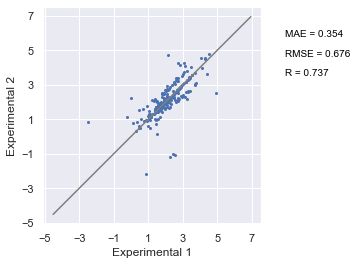

In [38]:
plot_diagram(Chembl,['Smiles_unify','species','Type of Microsomes'],'value')

In [39]:
Chembl = Chembl[['Smiles','value','unit','species','conc','Presence of NADPH/NADP','source']]

# Concat all data

In [40]:
all_data = Chembl.copy(deep=True)

In [41]:
all_data[all_data['Smiles'].isna()]

,Smiles,value,unit,species,conc,Presence of NADPH/NADP,source


In [42]:
all_data['source'].nunique(),all_data.shape

(703, (5252, 7))

In [43]:
all_data

,Smiles,value,unit,species,conc,Presence of NADPH/NADP,source
0,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,1.886491,log10(mL.min-1.g-1),human,1 uM,none,CHEMBL928910
1,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,1.146128,log10(mL.min-1.g-1),rat,1 uM,none,CHEMBL928911
2,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,1.255273,log10(mL.min-1.g-1),rat,1 uM,none,CHEMBL928911
3,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,1.949390,log10(mL.min-1.g-1),rat,none,none,CHEMBL1002992
5,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,2.383815,log10(mL.min-1.g-1),mouse,in presence of NADPH,mouse microsome,CHEMBL1645623
...,...,...,...,...,...,...,...
22021,COCC(C)Nc1cnc2nc(-c3cc(NC(=O)N4CCCC4)ccc3F)ccn12,0.826075,log10(mL.min-1.g-1),mouse,none,none,CHEMBL5151071
22025,CCc1cc2ncc(CN3CCN(c4ccc(C(=O)NC)nc4)CC3)cc2[nH...,0.505150,log10(mL.min-1.g-1),mouse,unbound,none,CHEMBL5152073
22026,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,1.908485,log10(mL.min-1.g-1),rat,none,none,CHEMBL5216721
22027,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,1.840733,log10(mL.min-1.g-1),human,none,none,CHEMBL5167412


In [44]:
all_data = process_stage_1(all_data,'Smiles')

100%|█████████████████████████████████████████| 5252/5252 [00:00<00:00, 9180.84it/s]


SANITIZE_NONE    5252
Name: Smiles_check, dtype: int64


100%|██████████████████████████████████████| 5252/5252 [00:00<00:00, 1124590.80it/s]
5252it [00:05, 943.90it/s] 


Metal in Smiles amount: 0


100%|█████████████████████████████████████████| 5252/5252 [00:00<00:00, 8512.18it/s]


In [45]:
all_data['property'] = 'microsomal clearance'

In [46]:
all_data = all_data[['Smiles_unify','Smiles','value','unit','species','conc','Presence of NADPH/NADP','source']]

In [48]:
all_data

,Smiles_unify,Smiles,value,unit,species,conc,Presence of NADPH/NADP,source
0,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)...,1.886491,log10(mL.min-1.g-1),human,1 uM,none,CHEMBL928910
1,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,1.146128,log10(mL.min-1.g-1),rat,1 uM,none,CHEMBL928911
2,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,1.255273,log10(mL.min-1.g-1),rat,1 uM,none,CHEMBL928911
3,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,CCCCNC(=O)c1ccc2c(c1)N=C(c1ccc(Cl)cc1)c1ccccc1S2,1.949390,log10(mL.min-1.g-1),rat,none,none,CHEMBL1002992
5,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,Cc1cc(SCc2cc(=O)[nH][nH]2)c(C)cc1Cl,2.383815,log10(mL.min-1.g-1),mouse,in presence of NADPH,mouse microsome,CHEMBL1645623
...,...,...,...,...,...,...,...,...
22021,COCC(C)Nc1cnc2nc(-c3cc(NC(=O)N4CCCC4)ccc3F)ccn12,COCC(C)Nc1cnc2nc(-c3cc(NC(=O)N4CCCC4)ccc3F)ccn12,0.826075,log10(mL.min-1.g-1),mouse,none,none,CHEMBL5151071
22025,CCc1cc2ncc(CN3CCN(c4ccc(C(=O)NC)nc4)CC3)cc2[nH...,CCc1cc2ncc(CN3CCN(c4ccc(C(=O)NC)nc4)CC3)cc2[nH...,0.505150,log10(mL.min-1.g-1),mouse,unbound,none,CHEMBL5152073
22026,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,Cc1ncc(S(=O)(=O)N2CC[C@H](C(=O)Nc3ccc4scnc4c3)...,1.908485,log10(mL.min-1.g-1),rat,none,none,CHEMBL5216721
22027,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,CCOc1ccc(F)cc1NC(=O)c1cc(C)ccc1NS(=O)(=O)CC,1.840733,log10(mL.min-1.g-1),human,none,none,CHEMBL5167412


In [47]:
all_data.to_csv('../data/data_processing_result/microsomal_cl_preprocessing_finished.csv',index=False)